In [15]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [16]:
df= pd.read_csv('solar_clean_data.csv')

In [17]:
df.columns  

Index(['Date', 'Total Generation (KWH)', 'Insolation', 'Grid Failure',
       'Inverter', 'Module Cleaning', 'Rainy day',
       'Transformer replacement and maintenance', 'Cable and Fuse maintenance',
       'Plant Shutdown', 'Internet', 'Battery', 'Cloudy'],
      dtype='object')

In [18]:
df.drop(['Date'],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Total Generation (KWH)                   2370 non-null   float64
 1   Insolation                               2370 non-null   float64
 2   Grid Failure                             2370 non-null   int64  
 3   Inverter                                 2370 non-null   int64  
 4   Module Cleaning                          2370 non-null   int64  
 5   Rainy day                                2370 non-null   int64  
 6   Transformer replacement and maintenance  2370 non-null   int64  
 7   Cable and Fuse maintenance               2370 non-null   int64  
 8   Plant Shutdown                           2370 non-null   int64  
 9   Internet                                 2370 non-null   int64  
 10  Battery                                  2370 no

In [20]:
df.head()

,Total Generation (KWH),Insolation,Grid Failure,Inverter,Module Cleaning,Rainy day,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy
0,3218.0,9.37536,1,0,0,0,0,0,0,0,0,0
1,3633.0,9.37536,1,0,0,0,0,0,0,0,0,0
2,4377.0,9.37536,0,1,0,0,0,0,0,0,0,0
3,4625.0,9.37536,0,1,0,0,0,0,0,0,0,0
4,648.0,9.37536,0,1,0,0,0,0,0,0,0,0


In [21]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(1668.094284931068, 7.125657576755328e-305)

In [23]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.6050587889415096

In [29]:
fa = FactorAnalyzer()
fa.fit(df)
fa.set_params(rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.03543971, 1.14685108, 1.07081841, 1.05491949, 1.02460678,
       1.00204643, 0.98426929, 0.94516836, 0.84585834, 0.79921424,
       0.63162997, 0.45917789])

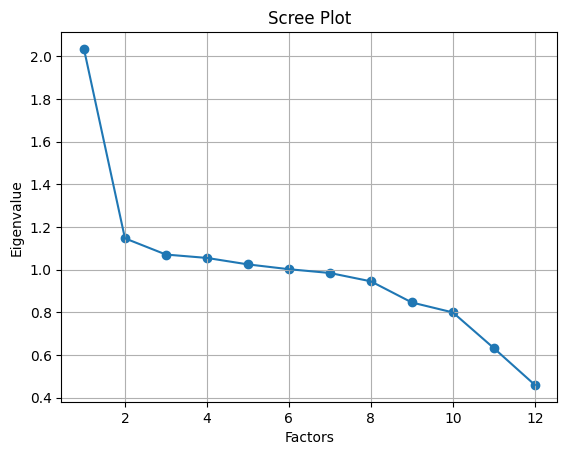

In [30]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [47]:
fa = FactorAnalyzer(6,rotation='varimax')
fa.fit(df)
fa.loadings_

array([[-2.20001341e-01, -3.42172494e-01, -1.01723829e-01,
         9.02290931e-01, -6.13859311e-02, -3.68827487e-02],
       [-5.62153682e-04, -1.64897792e-02, -1.50563845e-02,
        -3.71348478e-02, -2.65880346e-02, -1.40461456e-02],
       [ 3.02495150e-02, -6.48470772e-03,  9.96477201e-01,
        -2.69520460e-02,  1.44697492e-02, -1.19629382e-02],
       [ 9.91157354e-01,  4.96118637e-02,  2.69755060e-02,
        -8.67184450e-02, -4.00729138e-02,  3.91609569e-02],
       [-2.02726382e-01, -1.47032854e-01,  2.71024395e-02,
         8.00879312e-02,  6.09379977e-01, -2.35229615e-02],
       [ 3.28410775e-01,  2.61110339e-01, -4.35285659e-03,
        -9.13936492e-02,  1.95378596e-02, -5.70313755e-02],
       [ 5.25012068e-02, -3.56569167e-02, -1.37460141e-02,
        -5.43457503e-02,  8.75734915e-02, -3.23313660e-02],
       [-5.17763975e-02,  9.69908844e-03, -1.67580784e-03,
         3.54339935e-02,  5.33140266e-02,  1.44510158e-01],
       [-4.30258646e-03, -5.13052500e-03,  2.754

In [48]:
fa.get_factor_variance()

(array([1.20869446, 1.18918639, 1.00674475, 0.85128389, 0.44319115,
        0.23177892]),
 array([0.10072454, 0.09909887, 0.0838954 , 0.07094032, 0.0369326 ,
        0.01931491]),
 array([0.10072454, 0.1998234 , 0.2837188 , 0.35465912, 0.39159172,
        0.41090663]))